In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, classification_report, confusion_matrix, log_loss,accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/ds-mahbub/24MLE01_Machine-Learning-Engineer/KNN/Classification/data/music_clean.csv")

In [3]:
df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [4]:
df.drop(columns="Unnamed: 0",axis=1,inplace=True)

In [5]:
df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre             1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [7]:
df.isnull().sum()

popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64

In [8]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
count,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,51.660000,0.258649,0.542602,2.172204e+05,0.636464,0.137289,0.199993,-8.253305,0.077879,120.368400,0.480057,0.50000
std,14.028585,0.307494,0.160322,1.175582e+05,0.237789,0.285558,0.160435,5.158523,0.089451,28.942130,0.237854,0.50025
min,0.000000,0.000003,0.062400,-1.000000e+00,0.002510,0.000000,0.025400,-38.718000,0.023400,56.855000,0.029800,0.00000
25%,43.750000,0.013275,0.444000,1.806562e+05,0.485750,0.000000,0.100000,-9.775500,0.033100,95.909750,0.306500,0.00000
50%,54.000000,0.116000,0.548500,2.163000e+05,0.676500,0.000089,0.131000,-6.855000,0.043600,119.952961,0.473500,0.50000
75%,62.000000,0.426500,0.657000,2.605025e+05,0.822500,0.042825,0.273250,-4.977750,0.074950,140.033000,0.654000,1.00000
max,82.000000,0.996000,0.950000,1.617333e+06,0.995000,0.975000,0.991000,-0.883000,0.710000,207.852000,0.968000,1.00000


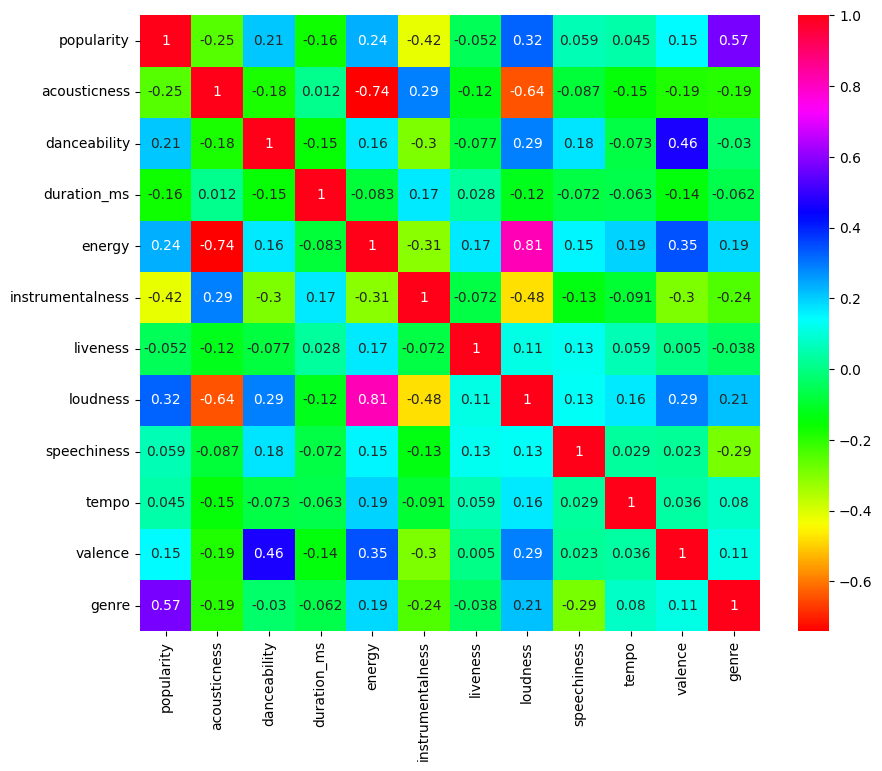

In [ ]:
plt.figure(figsize=(10,8))
x=df.corr()
sns.heatmap(x,annot=True,cmap="hsv")
plt.show()


In [ ]:
df["genre"].value_counts()

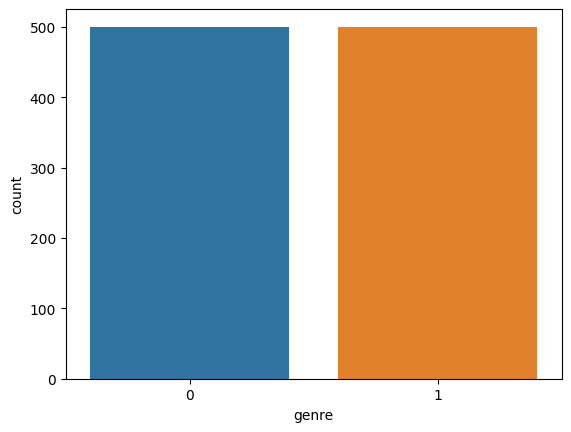

In [ ]:
sns.countplot(x="genre",data=df)
plt.show()

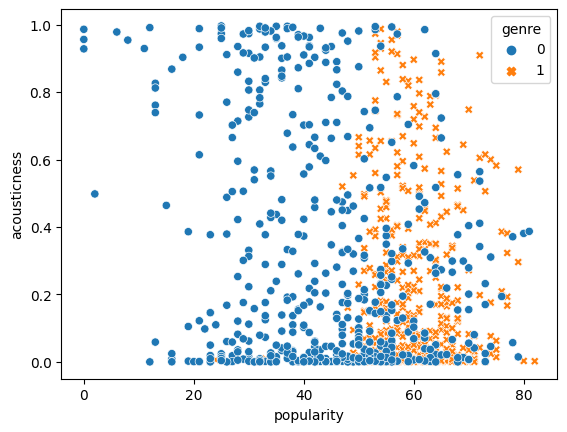

In [12]:
sns.scatterplot(data=df, x="popularity", y="acousticness", hue="genre", style="genre")
plt.show()

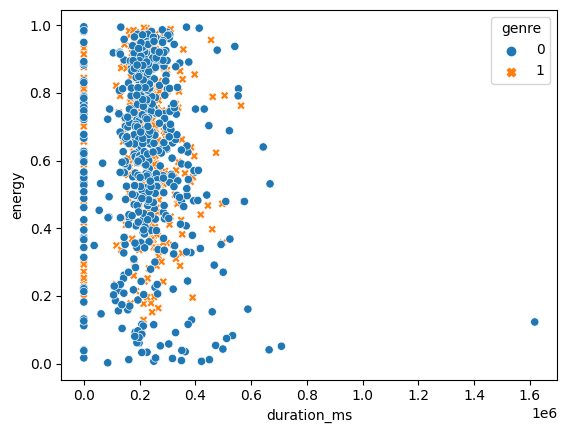

In [13]:
sns.scatterplot(data=df, x="duration_ms", y="energy", hue="genre", style="genre")
plt.show()

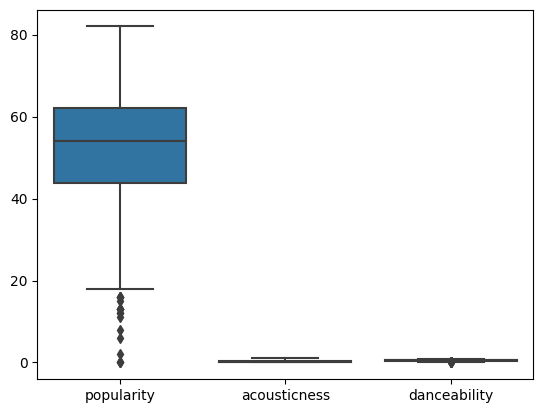

In [14]:
sns.boxplot(data=df[["popularity","acousticness","danceability"]])
plt.show()

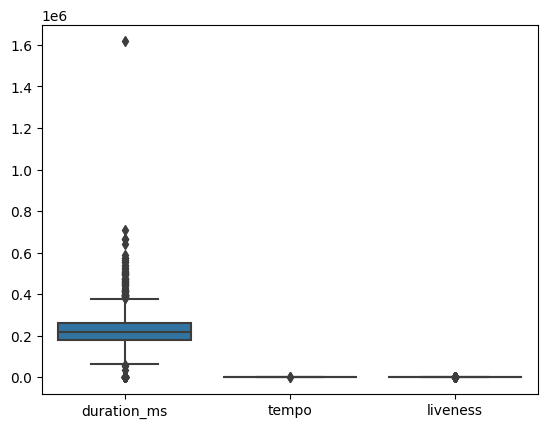

In [15]:
sns.boxplot(data=df[["duration_ms","tempo","liveness"]])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

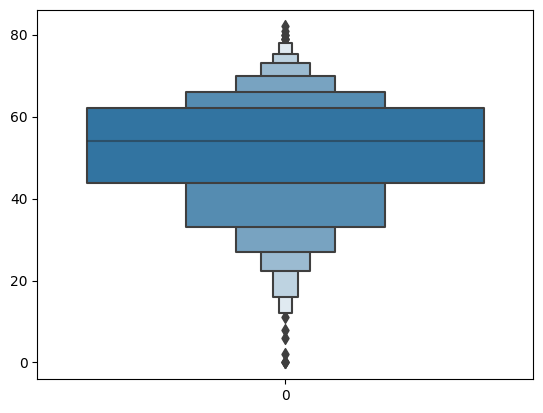

In [16]:
sns.boxenplot(data=df["popularity"])

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

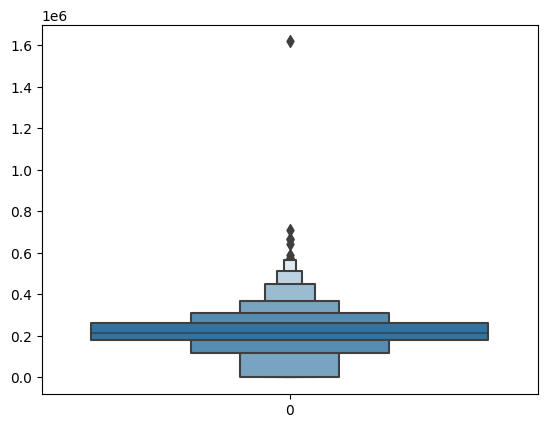

In [17]:
sns.boxenplot(data=df["duration_ms"])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


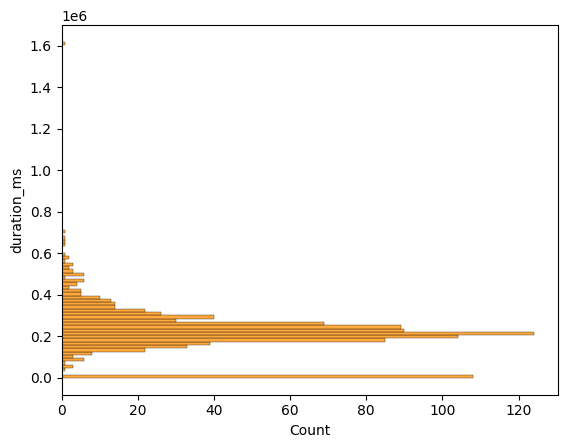

In [18]:
sns.histplot(data=df, y="duration_ms",color="darkorange")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


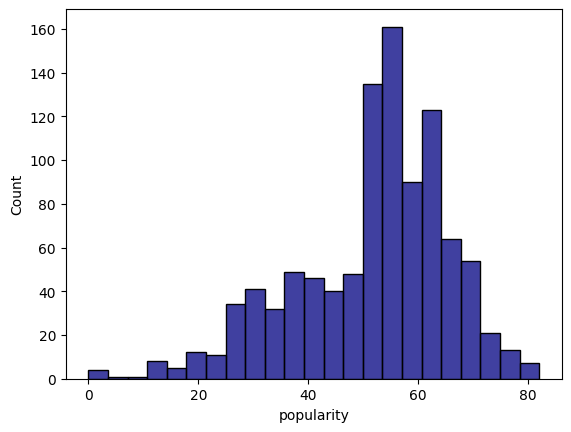

In [19]:
sns.histplot(data=df, x="popularity",color="navy")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


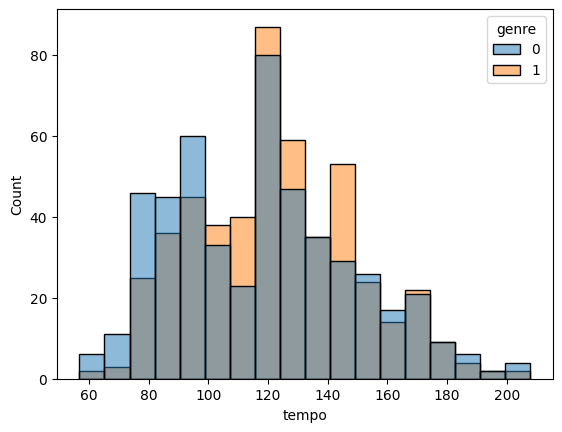

In [20]:
sns.histplot(data=df, x="tempo",hue="genre")
plt.show()

In [22]:
X=df.drop(columns="genre",axis=1)
Y=df["genre"]

In [23]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# CatBoostClassifier

In [25]:

from catboost import CatBoostClassifier
cat = CatBoostClassifier(iterations=200)
cat.fit(X_train, y_train)




Learning rate set to 0.040974
0:	learn: 0.6566300	total: 3.24ms	remaining: 646ms
1:	learn: 0.6206379	total: 5.32ms	remaining: 527ms
2:	learn: 0.5906171	total: 7.29ms	remaining: 479ms
3:	learn: 0.5652650	total: 9.26ms	remaining: 454ms
4:	learn: 0.5405187	total: 11.2ms	remaining: 436ms
5:	learn: 0.5178087	total: 13.1ms	remaining: 425ms
6:	learn: 0.4979647	total: 15ms	remaining: 413ms
7:	learn: 0.4809249	total: 16.9ms	remaining: 406ms
8:	learn: 0.4591117	total: 18.9ms	remaining: 401ms
9:	learn: 0.4404056	total: 21ms	remaining: 399ms
10:	learn: 0.4245670	total: 22.9ms	remaining: 394ms
11:	learn: 0.4114808	total: 25ms	remaining: 391ms
12:	learn: 0.3984653	total: 27ms	remaining: 389ms
13:	learn: 0.3888991	total: 29ms	remaining: 385ms
14:	learn: 0.3785802	total: 30.9ms	remaining: 381ms
15:	learn: 0.3669143	total: 32.9ms	remaining: 379ms
16:	learn: 0.3559462	total: 34.9ms	remaining: 376ms
17:	learn: 0.3482923	total: 37.1ms	remaining: 375ms
18:	learn: 0.3404866	total: 39.4ms	remaining: 375ms
19

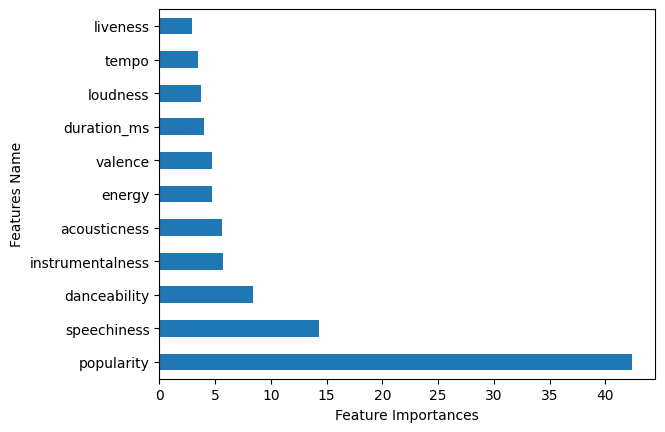

In [27]:
feat_importances = pd.Series(cat.feature_importances_, index = X.columns)
feat_importances.nlargest(len(df.columns)).plot(kind = 'barh')
plt.xlabel('Feature Importances')
plt.ylabel('Features Name')
plt.show()

In [33]:
feat_importances.sort_values(ascending =True)

liveness             2.929142
tempo                3.490600
loudness             3.741008
duration_ms          3.987259
valence              4.706906
energy               4.713661
acousticness         5.616904
instrumentalness     5.726518
danceability         8.431774
speechiness         14.297965
popularity          42.358264
dtype: float64

In [32]:
pred1=cat.predict(X_test)
acc=accuracy_score(y_test,pred1)
print(f"Accuracy score is : {acc}")

Accuracy score is : 0.82


In [34]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       104
           1       0.78      0.88      0.82        96

    accuracy                           0.82       200
   macro avg       0.82      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200



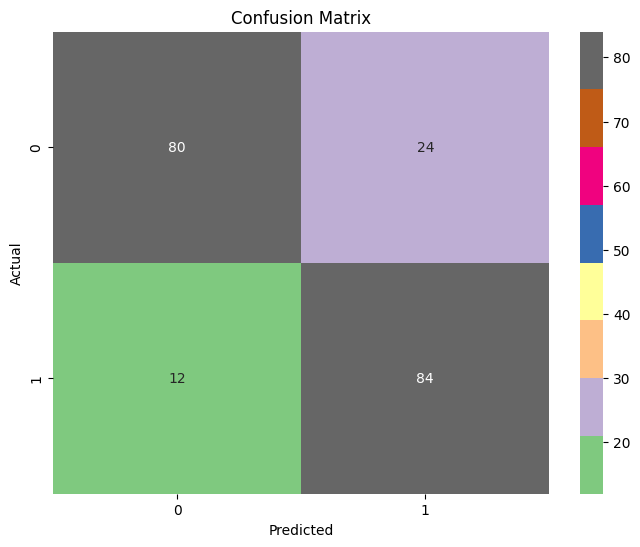

In [35]:
conf_matrix = confusion_matrix(y_test,pred1)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Accent', cbar = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- TP: Actual & Predicted both are positive ---> 84
- FP: Actual Negative, Model predicted as positive ---> 25
- TN: Actual and Predicted both are negative -----> 80
- FN: Actual Positive but predicted as Negative ----> 12

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = cat.predict(X_test)


precision = precision_score(y_test, y_pred)


recall = recall_score(y_test, y_pred)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.7777777777777778
Recall: 0.875
F1 Score: 0.823529411764706


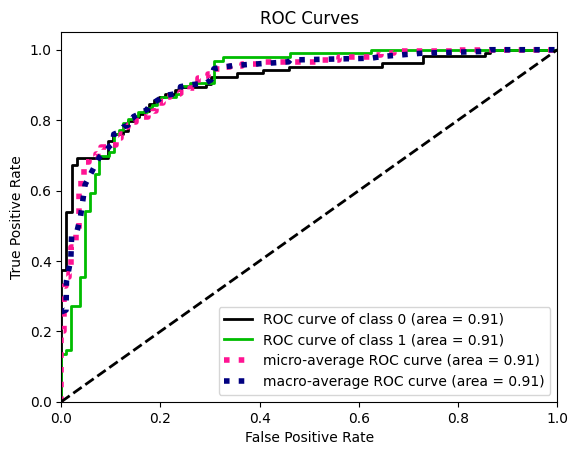

In [45]:
import scikitplot as skplt

y_probas = cat.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

# KNeighborsClassifier

In [39]:
from sklearn.neighbors import KNeighborsClassifier

n=np.arange(1,30)
train_acc={}
test_acc={}
for i in n:
    knn=KNeighborsClassifier(n_neighbors =i)
    knn.fit(X_train,y_train)
    train_acc[i]=knn.score(X_train,y_train)
    test_acc[i]=knn.score(X_test,y_test)

    
print(f"Train accuracy : {train_acc}")
print("\n\n")
print(f"Test accuracy : {test_acc}")


Train accuracy : {1: 1.0, 2: 0.78, 3: 0.77125, 4: 0.70125, 5: 0.68625, 6: 0.68375, 7: 0.66375, 8: 0.65875, 9: 0.66625, 10: 0.6625, 11: 0.65625, 12: 0.66, 13: 0.655, 14: 0.6575, 15: 0.63875, 16: 0.64375, 17: 0.64, 18: 0.63125, 19: 0.64125, 20: 0.635, 21: 0.6375, 22: 0.61875, 23: 0.635, 24: 0.62, 25: 0.615, 26: 0.61875, 27: 0.61375, 28: 0.61, 29: 0.615}



Test accuracy : {1: 0.505, 2: 0.515, 3: 0.5, 4: 0.52, 5: 0.54, 6: 0.51, 7: 0.55, 8: 0.53, 9: 0.535, 10: 0.575, 11: 0.56, 12: 0.555, 13: 0.56, 14: 0.55, 15: 0.55, 16: 0.535, 17: 0.55, 18: 0.535, 19: 0.56, 20: 0.55, 21: 0.565, 22: 0.565, 23: 0.58, 24: 0.57, 25: 0.58, 26: 0.575, 27: 0.6, 28: 0.595, 29: 0.615}


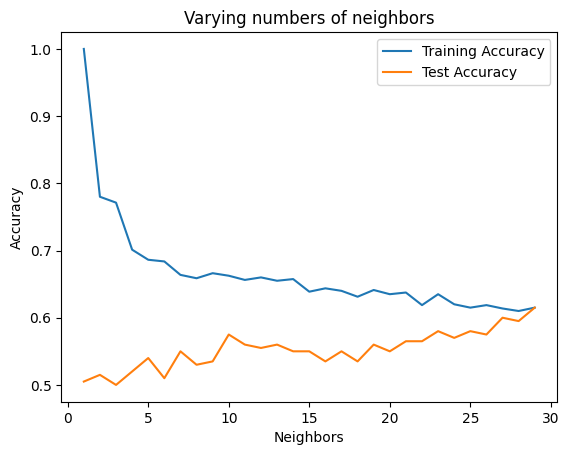

In [40]:
plt.title('Varying numbers of neighbors')
plt.plot(n, train_acc.values(), label = 'Training Accuracy')
plt.plot(n, test_acc.values(), label = 'Test Accuracy')
plt.legend()
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [42]:
pred2=knn.predict(X_test)
acc2=accuracy_score(y_test,pred2)
print("Accuracy score :",acc2)

Accuracy score : 0.615


In [43]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.65      0.57      0.61       104
           1       0.59      0.67      0.62        96

    accuracy                           0.61       200
   macro avg       0.62      0.62      0.61       200
weighted avg       0.62      0.61      0.61       200



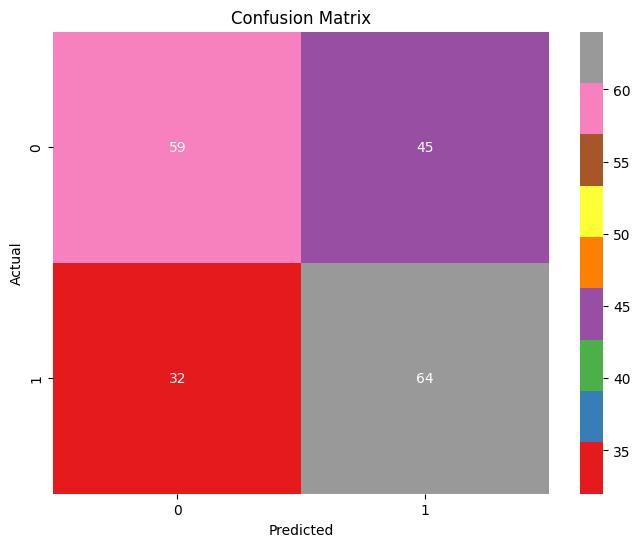

In [44]:
conf_matrix = confusion_matrix(y_test,pred2)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Set1', cbar = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

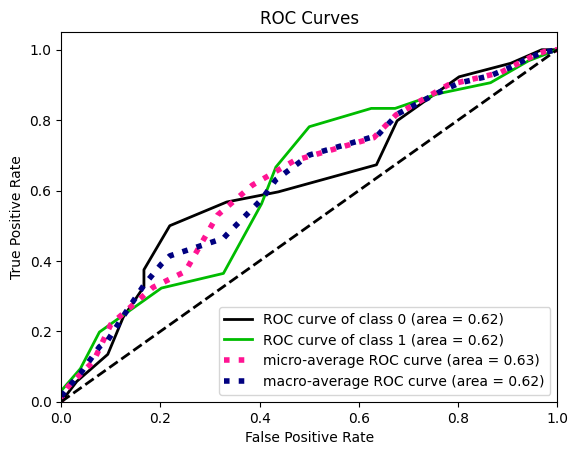

In [46]:
y_probas = knn.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

In [49]:
print(f"train accuracy : {knn.score(X_train,y_train)}")
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(f"test accuracy : {knn.score(X_test,y_test)}")

train accuracy : 0.615
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
test accuracy : 0.615


# grid search

In [51]:
from sklearn.model_selection import  GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidian', 'manhattan']
}
grid_search = GridSearchCV(knn, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
130 fits failed out of a total of 260.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
130 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-packages/s

In [52]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 27, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=27)

In [53]:
print(f'Trainning Accuracy: {knn.score(X_train, y_train)}')
print(f'Testing Accuracy: {knn.score(X_test, y_test)}')

Trainning Accuracy: 0.6175
Testing Accuracy: 0.61


#  DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

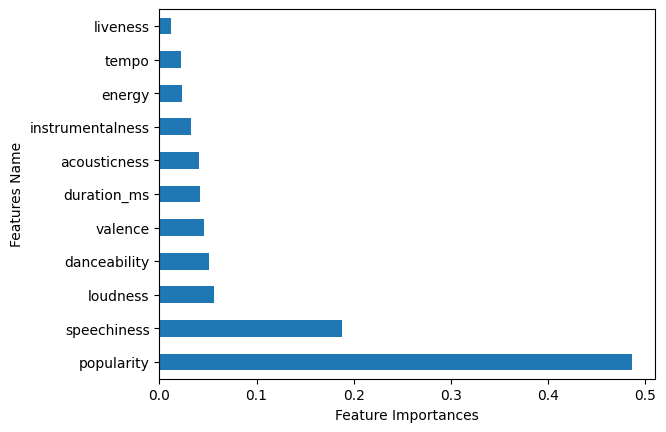

In [55]:
feat_importances = pd.Series(dt.feature_importances_, index = X.columns)
feat_importances.nlargest(len(df.columns)).plot(kind = 'barh')
plt.xlabel('Feature Importances')
plt.ylabel('Features Name')
plt.show()

In [56]:
pred3=dt.predict(X_test)
acc3=accuracy_score(y_test,pred3)
print("Accuracy score :",acc3)

Accuracy score : 0.745


In [57]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       104
           1       0.73      0.74      0.74        96

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.75      0.74      0.75       200



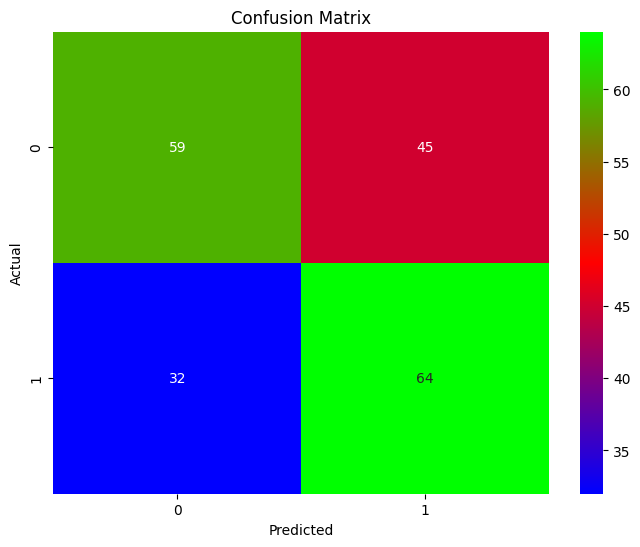

In [58]:
conf_matrix = confusion_matrix(y_test,pred3)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'brg', cbar = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

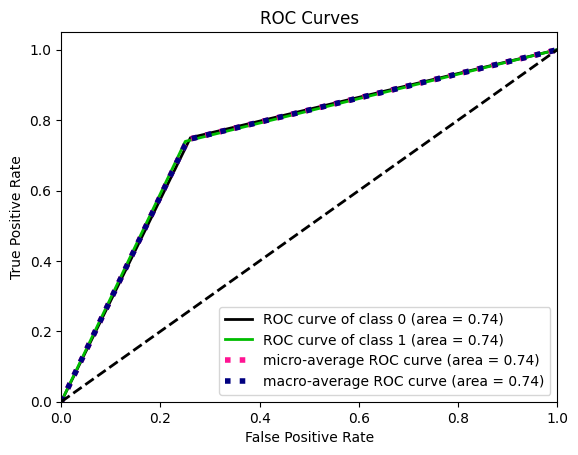

In [59]:
y_probas = dt.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

# grid search for dt

In [61]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_

print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}


# after grid search

In [62]:
best_dt_classifier = grid_search.best_estimator_
y_pred = best_dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.79


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       104
           1       0.75      0.83      0.79        96

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200



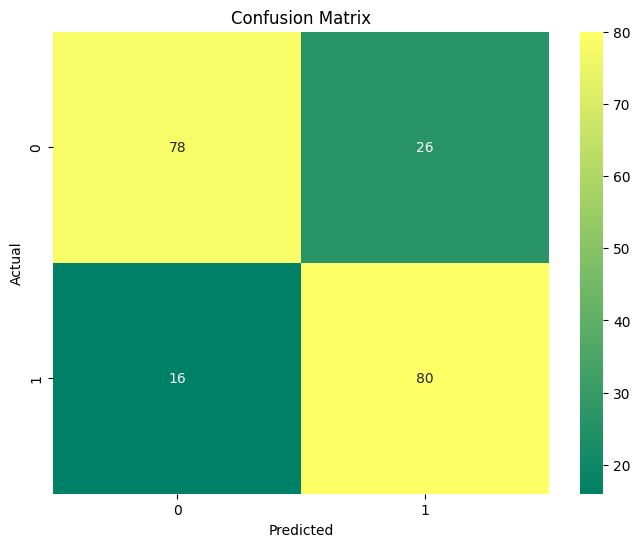

In [65]:
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'summer', cbar = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

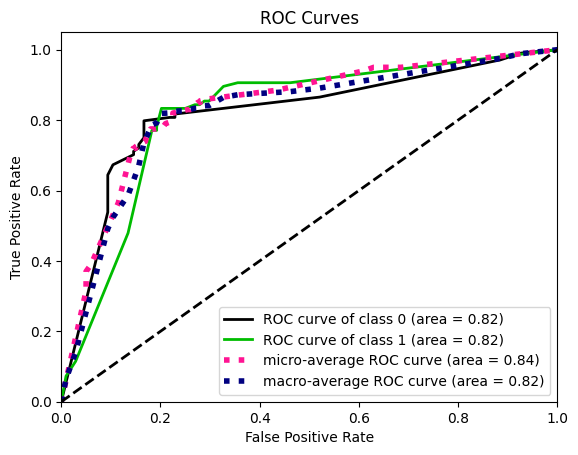

In [66]:
y_probas = best_dt_classifier.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()